In [15]:
import string

def get_and_clean_data():
    data = pd.read_csv("data/software_developer_united_states_1971_20191023_1.csv")
    description = data['job_description']
    cleaned_description = description.apply(
        lambda s: s.translate(str.maketrans('','', string.punctuation + u'\xa0')))
    cleaned_description = cleaned_description.apply(lambda s:s.lower())
    cleaned_description = cleaned_description.apply(
        lambda s:s.translate(str.maketrans(string.whitespace, ' ' * len(string.whitespace), '')))
    cleaned_description = cleaned_description.drop_duplicates()
    return cleaned_description

def simple_tokenize(data):
    cleaned_description = data.apply(lambda s: [x.strip() for x in s.split()])
    return cleaned_description

def parse_job_description():
    cleaned_description = get_and_clean_data()
    cleaned_description = simple_tokenize(cleaned_description)
    return cleaned_description


# Page 69

#### 1000 rows

In [16]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import time

start_time_1000 = time.time()

# Step 1: Limit to just 1000 rows
cleaned_description = get_and_clean_data()[:1000]

# Step 2: Replace non-alphabets with spaces and collapse spaces
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

# Step 3: Tokenize
tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

# Step 4: Remove stop words
stop_dict = set(stopwords.words('english'))
sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])

# Step 5: Create stem caches
concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
stem_cache = {}
ps = PorterStemmer()
for word in concated:
    stem_cache[word] = ps.stem(word)

# Step 6: Stem the tokens
stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[word] for word in s])

# Step 7: Vectorize using CountVectorizer
cv = CountVectorizer(analyzer=lambda s: s)
vectorizer = cv.fit(stemmed_description)
X = vectorizer.transform(stemmed_description)

# Step 8: Convert to DataFrame and display
df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
print(df)

end_time_1000 = time.time()
total_time_1000 = end_time_1000 - start_time_1000
print(f"Total processing time: {total_time_1000:.4f} seconds")


     aa  aaa  aadairstrategicstaffcom  aaeeo  aampt  aapeeo  aau  ab  abap  \
0     0    0                        0      0      0       0    0   0     0   
1     0    0                        0      0      0       0    0   0     0   
2     0    0                        0      0      0       0    0   0     0   
3     0    0                        0      0      0       0    0   0     0   
4     0    0                        0      0      0       0    0   0     0   
..   ..  ...                      ...    ...    ...     ...  ...  ..   ...   
995   0    0                        0      0      0       0    0   0     0   
996   0    0                        0      0      0       0    0   0     0   
997   0    0                        0      0      0       0    0   0     0   
998   0    0                        0      0      0       0    0   0     0   
999   0    0                        0      0      0       0    0   0     0   

     abapworkflow  ...  zeromq  zigbe  zip  zipkin  zone  zooke

### all rows

In [17]:
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from ordered_set import OrderedSet
from sklearn.feature_extraction.text import CountVectorizer

start_time = time.time()

# Step 1: Limit to just 1000 rows
cleaned_description = get_and_clean_data()

# Step 2: Replace non-alphabets with spaces and collapse spaces
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

# Step 3: Tokenize
tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

# Step 4: Remove stop words
stop_dict = set(stopwords.words('english'))
sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])

# Step 5: Create stem caches
concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
stem_cache = {}
ps = PorterStemmer()
for word in concated:
    stem_cache[word] = ps.stem(word)

# Step 6: Stem the tokens
stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[word] for word in s])

# Step 7: Vectorize using CountVectorizer
cv = CountVectorizer(analyzer=lambda s: s)
vectorizer = cv.fit(stemmed_description)
X = vectorizer.transform(stemmed_description)

# Step 8: Convert to DataFrame and display
df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
print(df)

end_time = time.time()
total_time = end_time - start_time
print(f"Total processing time: {total_time:.4f} seconds")


      aa  aaa  aaacad  aac  aachen  aad  aadairstrategicstaffcom  aae  aaeeo  \
0      0    0       0    0       0    0                        0    0      0   
1      0    0       0    0       0    0                        0    0      0   
2      0    0       0    0       0    0                        0    0      0   
3      0    0       0    0       0    0                        0    0      0   
4      0    0       0    0       0    0                        0    0      0   
...   ..  ...     ...  ...     ...  ...                      ...  ...    ...   
7578   0    0       0    0       0    0                        0    0      0   
7579   0    0       0    0       0    0                        0    0      0   
7580   0    0       0    0       0    0                        0    0      0   
7581   0    0       0    0       0    0                        0    0      0   
7582   0    0       0    0       0    0                        0    0      0   

      aaeoe  ...  zthompsonjeffersonfra

### Comparing

In [18]:
import pandas as pd

# Prepare the data for the table
data = {
    'Dataset': ['Full Dataset', '1000 Rows'],
    'Execution Time (seconds)': [total_time, total_time_1000]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data)

# Display the table
print("Processing Time Comparison: Full Dataset vs 1000 Rows")
print(df_comparison)


Processing Time Comparison: Full Dataset vs 1000 Rows
        Dataset  Execution Time (seconds)
0  Full Dataset                 35.669861
1     1000 Rows                  9.700113


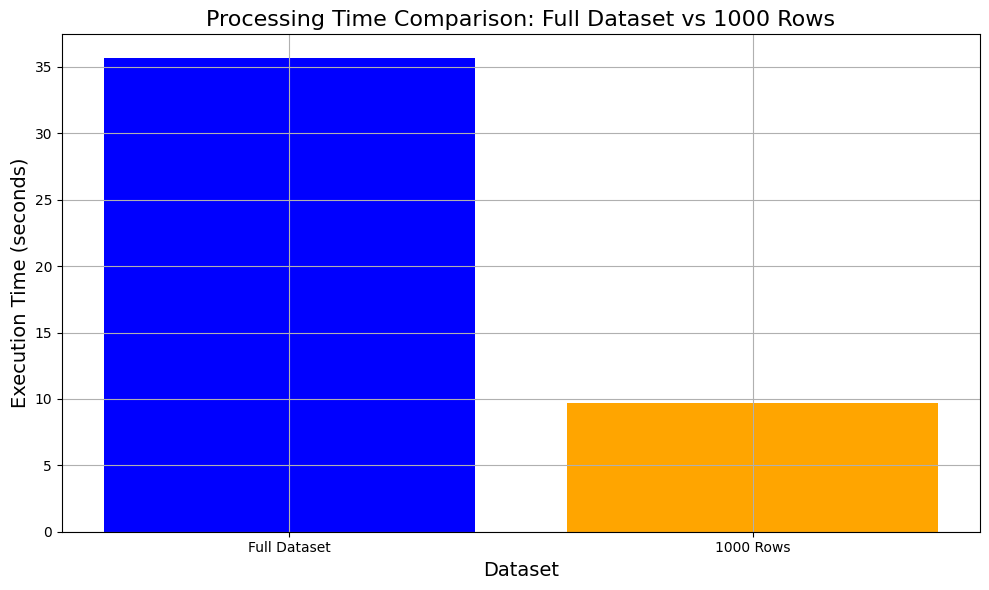

In [19]:
import matplotlib.pyplot as plt
# Prepare data for plotting
datasets = ['Full Dataset', '1000 Rows']
times = [total_time, total_time_1000]

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(datasets, times, color=['blue', 'orange'])

# Customize the plot
plt.title('Processing Time Comparison: Full Dataset vs 1000 Rows', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

### Page 74

1000 rows

In [20]:
def speedUpExperiment_1000(operation):
    """
    Function to experiment with different tokenization and stop-word removal strategies.

    Parameters:
    row (int): Number of rows to process.
    operation (str): Choice of stop-word removal operation. 
                     "set" for OrderedSet-based operation, 
                     "list" for list comprehension-based operation.
    """
    # Limit to just row rows
    cleaned_description = get_and_clean_data()[:1000]
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))
    print(operation)
    if operation == "set":
        stop_dict = set(stopwords.words())
        sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
    elif operation == "list":
        stop_dict = list(stopwords.words())
        sw_removed_description = tokenized_description.apply(lambda s: [word for word in s if word not in stop_dict])
    else:
        raise ValueError("Invalid operation. Use 'set' or 'list'.")
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])
    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)
    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])
    return stemmed_description



All rows

In [21]:
def speedUpExperiment(operation):
    """
    Function to experiment with different tokenization and stop-word removal strategies.

    Parameters:
    row (int): Number of rows to process.
    operation (str): Choice of stop-word removal operation. 
                     "set" for OrderedSet-based operation, 
                     "list" for list comprehension-based operation.
    """
    # Limit to just row rows
    cleaned_description = get_and_clean_data()
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))
    print(operation)
    if operation == "set":
        stop_dict = set(stopwords.words())
        sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
    elif operation == "list":
        stop_dict = list(stopwords.words())
        sw_removed_description = tokenized_description.apply(lambda s: [word for word in s if word not in stop_dict])
    else:
        raise ValueError("Invalid operation. Use 'set' or 'list'.")
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])
    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)
    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])
    return stemmed_description



# Comparing

set
list
set
list


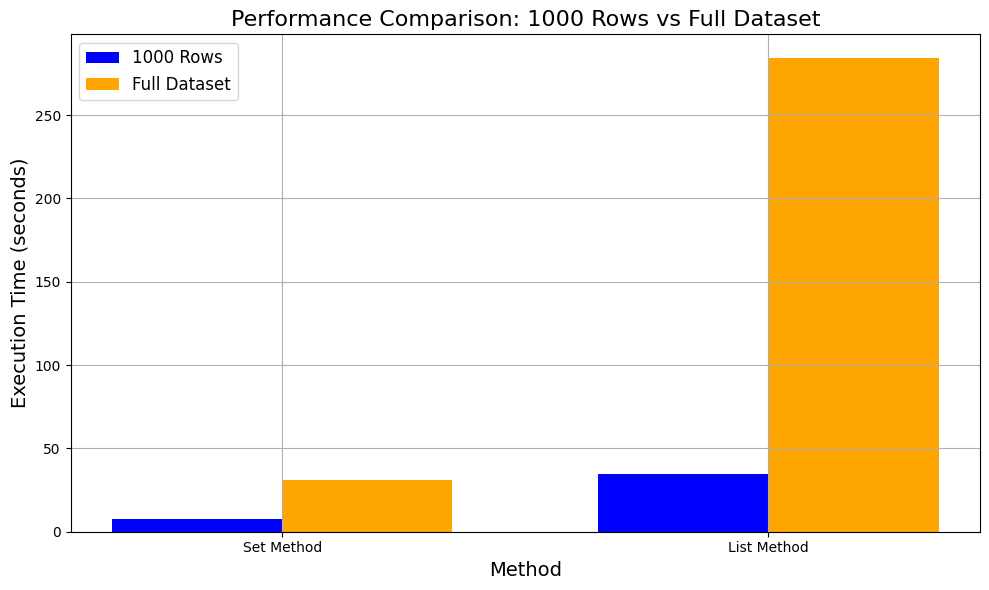

In [22]:
import timeit
import matplotlib.pyplot as plt

# Assuming 'speedUpExperiment_1000' is a function you have defined elsewhere
# and 'speedUpExperiment' is for full dataset.
set_time_1000 = timeit.timeit(lambda: speedUpExperiment_1000('set'), number=1)
list_time_1000 = timeit.timeit(lambda: speedUpExperiment_1000('list'), number=1)

set_time_full = timeit.timeit(lambda: speedUpExperiment('set'), number=1)
list_time_full = timeit.timeit(lambda: speedUpExperiment('list'), number=1)

# Prepare data for plotting
methods = ['Set Method', 'List Method']
times_1000 = [set_time_1000, list_time_1000]
times_full = [set_time_full, list_time_full]

# Plotting
plt.figure(figsize=(10, 6))

# Create bar plots for both 1000 rows and full dataset
bar_width = 0.35
index = range(len(methods))

# Plot for 1000 rows (shifted to the left)
plt.bar(index, times_1000, bar_width, color='blue', label='1000 Rows')

# Plot for full dataset (shifted to the right)
plt.bar([i + bar_width for i in index], times_full, bar_width, color='orange', label='Full Dataset')

# Customize the plot
plt.title('Performance Comparison: 1000 Rows vs Full Dataset', fontsize=16)
plt.xlabel('Method', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], methods)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [23]:
data = {
    'Method': ['Set Method', 'List Method'],
    '1000 Rows (seconds)': [set_time_1000, list_time_1000],
    'Full Dataset (seconds)': [set_time_full, list_time_full]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data)

# Display the table
print("Performance Comparison: 1000 Rows vs Full Dataset")
print(df_comparison)

Performance Comparison: 1000 Rows vs Full Dataset
        Method  1000 Rows (seconds)  Full Dataset (seconds)
0   Set Method             7.484521               30.775387
1  List Method            34.707603              284.276801


# Page 76

In [24]:
def multicoreSpeedUpExperiment(cleaned_description_split):  # Accept the input argument
    print(len(cleaned_description_split))  # Use cleaned_description_split instead of cleaned_description
    cleaned_description = cleaned_description_split.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))
    stop_dict = set(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])
    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)
    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])
    return stemmed_description


1000 rows

Testing with 1000 rows:
Testing with 1 cores...
1000


C:\Users\Admin\anaconda3\envs\new\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Execution time with 1 cores: 2.0469 seconds
Testing with 2 cores...
500
500
Execution time with 2 cores: 2.0797 seconds
Testing with 4 cores...
250
250
250
250
Execution time with 4 cores: 2.0447 seconds
Testing with 8 cores...
125
125
125
125
125
125
125
125
Execution time with 8 cores: 2.3060 seconds

Testing with full data:
Testing with 1 cores...
7583
Execution time with 1 cores: 21.9530 seconds
Testing with 2 cores...
3792
3791
Execution time with 2 cores: 20.0839 seconds
Testing with 4 cores...
1896
1896
1896
1895
Execution time with 4 cores: 19.0529 seconds
Testing with 8 cores...
948
948
948
948
948
948
948
947
Execution time with 8 cores: 18.1216 seconds

Summary of execution times for 1000 rows:
1 cores: 2.0469 seconds
2 cores: 2.0797 seconds
4 cores: 2.0447 seconds
8 cores: 2.3060 seconds

Summary of execution times for full data:
1 cores: 21.9530 seconds
2 cores: 20.0839 seconds
4 cores: 19.0529 seconds
8 cores: 18.1216 seconds


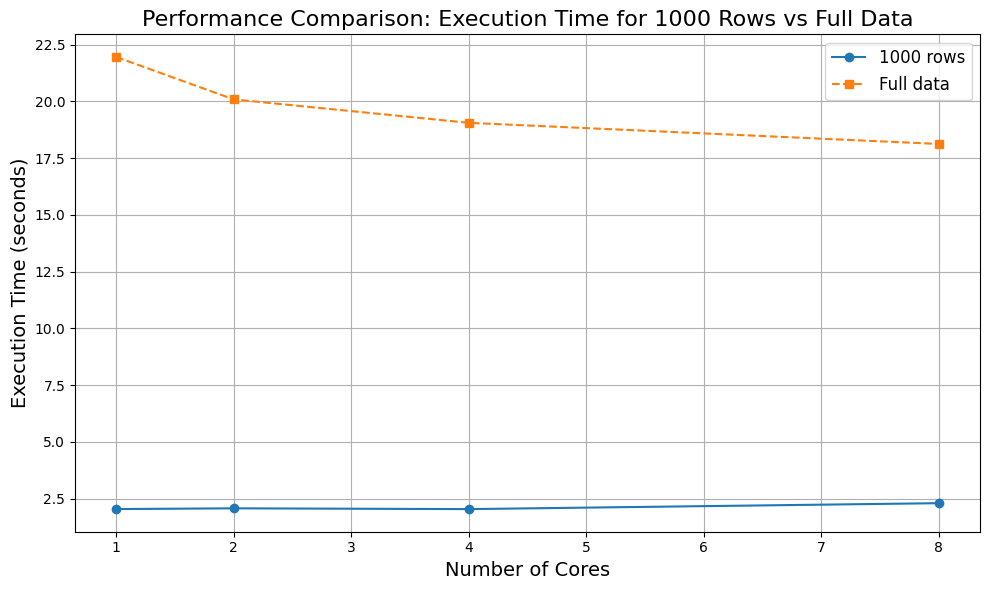

In [25]:
import multiprocessing
import time
import numpy as np  # Ensure numpy is imported
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming get_and_clean_data() is defined elsewhere and returns a list of data
cleaned_description_full = get_and_clean_data()  # Full data
cleaned_description_1000 = cleaned_description_full[:1000]  # First 1000 rows

core_exp_full = {}
core_exp_1000 = {}

max_cores = multiprocessing.cpu_count()

# Function to test execution time with different numbers of cores
def test_execution_time(cleaned_description, core_exp_dict):
    for c in [2**i for i in range(int(np.ceil(np.log2(multiprocessing.cpu_count()))) + 1)if 2**i <= max_cores]:
        # c = 1, 2, 4, 8, ...
        start = time.time()
        print(f"Testing with {c} cores...")
        
        # Split the data into `c` parts
        parsed_description_split = np.array_split(cleaned_description, c)
        
        # For non-macOS, use multiprocessing.Pool. For macOS, use ThreadPool as shown below
        with multiprocessing.pool.ThreadPool(c) as pool:
            pool.map(multicoreSpeedUpExperiment, parsed_description_split)
        
        end = time.time()
        execution_time = end - start
        core_exp_dict[c] = execution_time
        
        # Print the execution time
        print(f"Execution time with {c} cores: {execution_time:.4f} seconds")

# Test execution times for both 1000 rows and full data
print("Testing with 1000 rows:")
test_execution_time(cleaned_description_1000, core_exp_1000)

print("\nTesting with full data:")
test_execution_time(cleaned_description_full, core_exp_full)

# Optionally, print the results for both sets of data
print("\nSummary of execution times for 1000 rows:")
for cores, time_taken in core_exp_1000.items():
    print(f"{cores} cores: {time_taken:.4f} seconds")

print("\nSummary of execution times for full data:")
for cores, time_taken in core_exp_full.items():
    print(f"{cores} cores: {time_taken:.4f} seconds")

# You can also visualize the results by plotting them
import matplotlib.pyplot as plt

# Prepare data for plotting
cores_1000 = list(core_exp_1000.keys())
times_1000 = list(core_exp_1000.values())

cores_full = list(core_exp_full.keys())
times_full = list(core_exp_full.values())

# Plotting the execution times
plt.figure(figsize=(10, 6))
plt.plot(cores_1000, times_1000, label='1000 rows', marker='o', linestyle='-')
plt.plot(cores_full, times_full, label='Full data', marker='s', linestyle='--')

# Customize the plot
plt.title('Performance Comparison: Execution Time for 1000 Rows vs Full Data', fontsize=16)
plt.xlabel('Number of Cores', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [26]:
data = {
    'Cores': sorted(list(core_exp_1000.keys()) + list(core_exp_full.keys())),
    '1000 Rows (seconds)': [core_exp_1000.get(c, None) for c in sorted(list(core_exp_1000.keys()) + list(core_exp_full.keys()))],
    'Full Data (seconds)': [core_exp_full.get(c, None) for c in sorted(list(core_exp_1000.keys()) + list(core_exp_full.keys()))]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data)

# Display the table
print("\nPerformance Comparison: Execution Time for 1000 Rows vs Full Data")
print(df_comparison)


Performance Comparison: Execution Time for 1000 Rows vs Full Data
   Cores  1000 Rows (seconds)  Full Data (seconds)
0      1             2.046858            21.953006
1      1             2.046858            21.953006
2      2             2.079708            20.083883
3      2             2.079708            20.083883
4      4             2.044668            19.052869
5      4             2.044668            19.052869
6      8             2.306041            18.121619
7      8             2.306041            18.121619



Speedup for 1000 rows:
1 cores: 1.0000x speedup
2 cores: 0.9842x speedup
4 cores: 1.0011x speedup
8 cores: 0.8876x speedup

Speedup for full data:
1 cores: 1.0000x speedup
2 cores: 1.0931x speedup
4 cores: 1.1522x speedup
8 cores: 1.2114x speedup


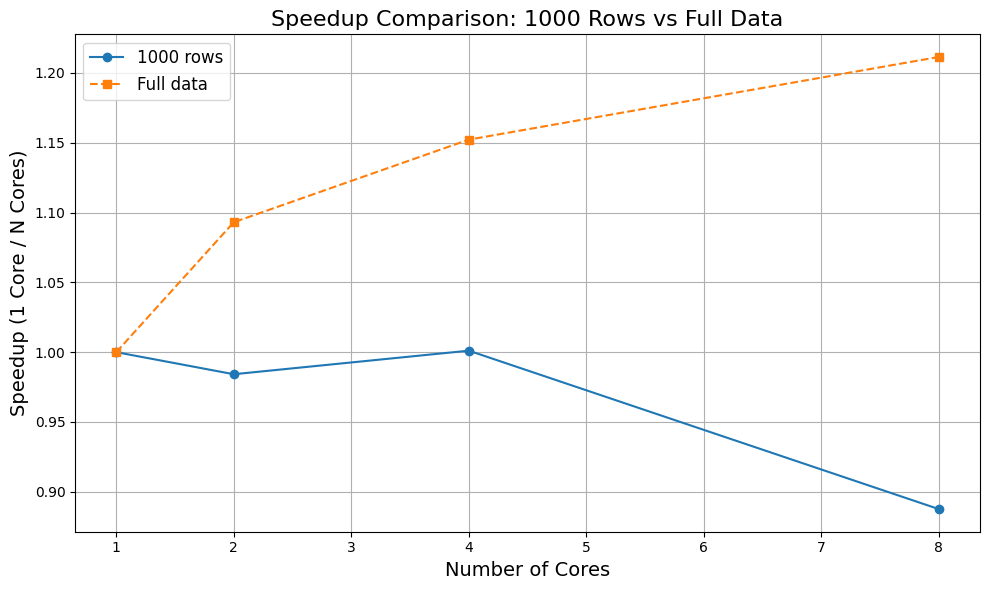

In [27]:
import matplotlib.pyplot as plt

# Assuming core_exp_1000 and core_exp_full already contain execution times for both datasets
# Calculate speedup for both 1000 rows and full data
speedup_1000 = {}
speedup_full = {}

# Speedup calculation (1 core vs N cores)
for cores in core_exp_1000:
    time_with_1_core_1000 = core_exp_1000[1] if 1 in core_exp_1000 else core_exp_1000[cores]
    speedup_1000[cores] = time_with_1_core_1000 / core_exp_1000[cores]

for cores in core_exp_full:
    time_with_1_core_full = core_exp_full[1] if 1 in core_exp_full else core_exp_full[cores]
    speedup_full[cores] = time_with_1_core_full / core_exp_full[cores]

# Print the speedup results
print("\nSpeedup for 1000 rows:")
for cores, speedup in speedup_1000.items():
    print(f"{cores} cores: {speedup:.4f}x speedup")

print("\nSpeedup for full data:")
for cores, speedup in speedup_full.items():
    print(f"{cores} cores: {speedup:.4f}x speedup")

# Plotting the speedup comparison
cores_1000 = list(speedup_1000.keys())
speedup_1000_values = list(speedup_1000.values())

cores_full = list(speedup_full.keys())
speedup_full_values = list(speedup_full.values())

# Plotting the speedup
plt.figure(figsize=(10, 6))
plt.plot(cores_1000, speedup_1000_values, label='1000 rows', marker='o', linestyle='-')
plt.plot(cores_full, speedup_full_values, label='Full data', marker='s', linestyle='--')

# Customize the plot
plt.title('Speedup Comparison: 1000 Rows vs Full Data', fontsize=16)
plt.xlabel('Number of Cores', fontsize=14)
plt.ylabel('Speedup (1 Core / N Cores)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

